## About the Dataset
#### The dataset, sourced from Kaggle, contains data on 1,338 individuals, collected randomly to ensure statistical relevance.
* Dataset Link: https://www.kaggle.com/datasets/simranjain17/insurance

#### Features:

*  Age: Age of individuals (in years)
*  Sex: Gender of individuals (1 for male, 0 for female)
*  BMI: Body Mass Index (kg/m²)
*  Smoking Status: Smoking status (1 for smoker, 0 for non-smoker)
*  Number of Children: Number of children (0-5)
*  Region: Geographic region (northeast, northwest, southeast, southwest)
*  Monthly Insurance Charges: Monthly insurance charges paid (in rupees)

## Problem statement

#### Objective:
* The primary objective of this study is to develop a Multiple Linear Regression Model (MLRM) capable of accurately predicting individual insurance premium charges. The model will utilize a range of predictors commonly available in health insurance datasets, ensuring that the prediction framework is both interpretable and practically applicable.

#### Goal:
* This analysis aims to explore and quantify the relationship between monthly insurance charges and key predictor variables such as age, sex, body mass index (BMI), smoking status, number of children, and region of residence. By assessing the direction and magnitude of these effects, we aim to identify which factors most significantly influence insurance costs and how they interact.

#### Emphasis:
* Special emphasis is placed on thorough model diagnostics and validation to ensure robustness, accuracy, and interpretability. This includes evaluating multicollinearity using Variance Inflation Factor (VIF), checking for autocorrelation via the Durbin-Watson statistic, and assessing normality of residuals using the Shapiro-Wilk test and QQ plots. We further inspect heteroscedasticity with the Breusch-Pagan test, identify influential observations using Cook’s distance, and evaluate the model's generalizability through k-fold cross-validation and adjusted R². These comprehensive diagnostics ensure that conclusions drawn from the model are statistically sound and practically meaningful

## Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

## Loading the dataset

In [2]:
#Load the data and view the first five observations
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Cleaning (checking for the incosistencies, duplicates, missing values)

In [3]:
#Getting the shape of the dataset
df.shape

(1338, 7)

###### The dataset consist of 1338 observations and 7 features

In [4]:
# Check for the duplicates
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [5]:
# One duplicate values was observed and dropped
df=df.drop_duplicates()

In [6]:
# check for the Null Values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### No null value is observed in the dataset

### Check for the incosistencies in the features

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
print("Sex distribution:\n", df['sex'].value_counts())
print("\nSmoker distribution:\n", df['smoker'].value_counts())
print("\nRegion distribution:\n", df['region'].value_counts())

Sex distribution:
 sex
male      675
female    662
Name: count, dtype: int64

Smoker distribution:
 smoker
no     1063
yes     274
Name: count, dtype: int64

Region distribution:
 region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


### Summary of the dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


###### No incsistencies in the data types

### Summary statistics for the quantitative variables

In [10]:
np.round(df.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.22,14.04,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.66,6.10,15.96,26.29,30.40,34.70,53.13
children,1337.0,1.10,1.21,0.00,0.00,1.00,2.00,5.00
charges,1337.0,13279.12,12110.36,1121.87,4746.34,9386.16,16657.72,63770.43


* The dataset contains 1,337 entries representing adult individuals, with numerical features including age, BMI, number of children, and insurance charges. The average age is 39.22 years with a fairly wide spread (standard deviation of 14.04), covering a range from 18 to 64 years. BMI values show a mean of 30.66, placing the average individual slightly in the obese category, with values ranging from 15.96 to 53.13, indicating the presence of both underweight and severely obese individuals. Most people have between 0 and 2 children, with a right-skewed distribution in the number of children per person.

* Insurance charges vary widely, with a mean cost of ₹13,279.12 and a very high standard deviation of ₹12,110.36, suggesting significant disparity in premiums paid. The median charge is lower at ₹9,386.16, and the maximum goes up to ₹63,770.43, implying the presence of high-cost outliers, possibly due to factors like age, smoking status, or high BMI. 

## Univariate Exploratory Data Analysis
* Age

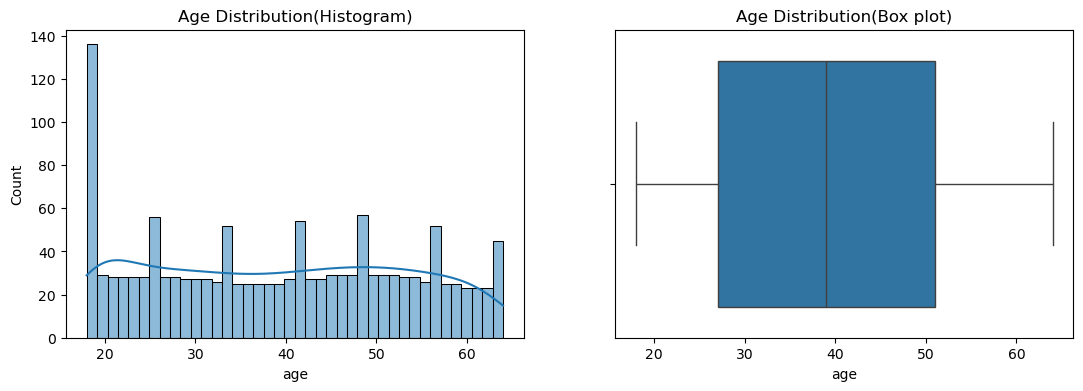

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
sns.histplot(data=df, x= 'age', bins=40, kde= True, ax=ax1)
# 1. Histogram to visualize the distribution of 'age'
ax1.set_title("Age Distribution(Histogram)")

# 1. Boxplot to visualize the distribution of 'age'
sns.boxplot(data=df, x= 'age', ax=ax2)
ax2.set_title("Age Distribution(Box plot)")
plt.tight_layout
plt.show()

* BMI

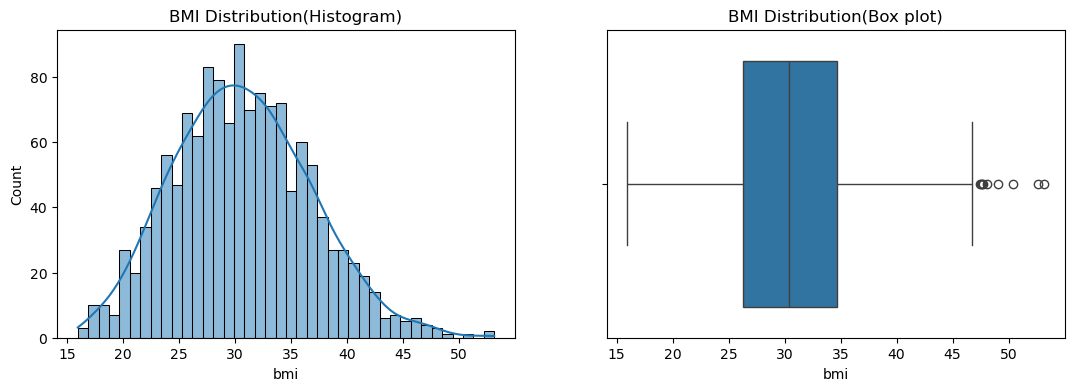

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
sns.histplot(data=df, x= 'bmi', bins=40, kde= True, ax=ax1)
# 1. Histogram to visualize the distribution of 'bmi'
ax1.set_title("BMI Distribution(Histogram)")

# 1. Boxplot to visualize the distribution of 'age'
sns.boxplot(data=df, x= 'bmi', ax=ax2)
ax2.set_title("BMI Distribution(Box plot)")
plt.tight_layout
plt.show()

* Charges (insurance Premium)

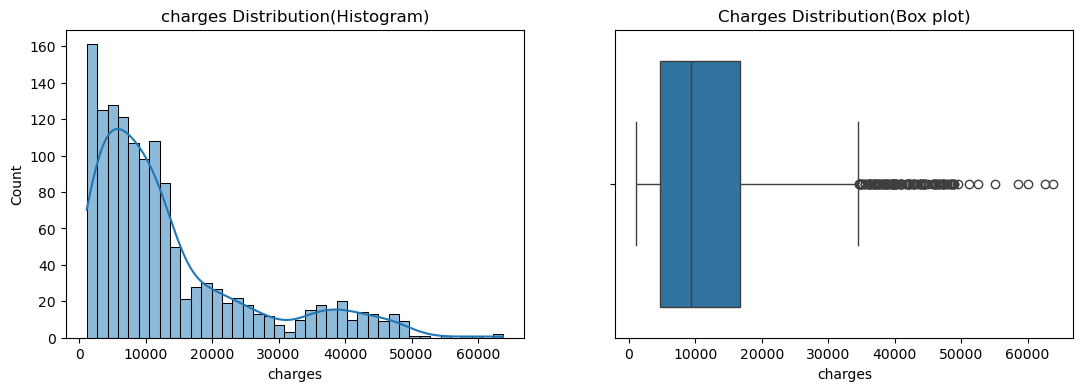

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
sns.histplot(data=df, x= 'charges', bins=40, kde= True, ax=ax1)
# 1. Histogram to visualize the distribution of 'age'
ax1.set_title("charges Distribution(Histogram)")

# 1. Boxplot to visualize the distribution of 'age'
sns.boxplot(data=df, x= 'charges', ax=ax2)
ax2.set_title("Charges Distribution(Box plot)")
plt.tight_layout
plt.show()

* The response variable is highly positively skewed with numerous outliers.We applied the Box-Cox transformation, aiming to make the response variable bell-shaped and symmetric
* 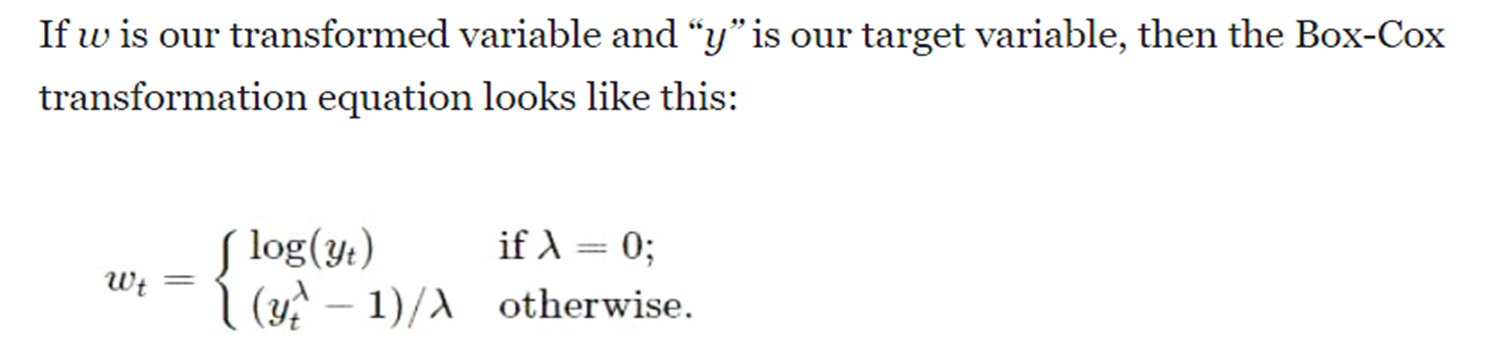!

In [14]:
#To confirm the above
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.8147607893099357, pvalue=1.1959741756687743e-36)

* The Shapiro-Wilk test shows W = 0.815 and p < 0.05, indicating charges are not normally distributed. The data is right-skewed, likely due to high outliers. A log transformation is recommended to reduce skewness.

### Box cox tranformation for the response variable (charges)

In [15]:
y= df["charges"]
y2, lam = stats.boxcox(y)
lam

0.043516942579678274

* Since λ ≈ 0, the transformation is very close to a log transformation.

* This confirms that the charges data is heavily right-skewed.

In [16]:
stats.shapiro(y2)

ShapiroResult(statistic=0.9836022370485226, pvalue=3.609466808010876e-11)

* p-value < 0.05 , Still not normally distributed.
* W = 0.984 shows improvement (better than original W = 0.815), but the data is still significantly skewed.
* So, while the Box-Cox transformation reduced skew, it did not fully normalize the distribution.

### Distribution of the transformed response variable (charges)

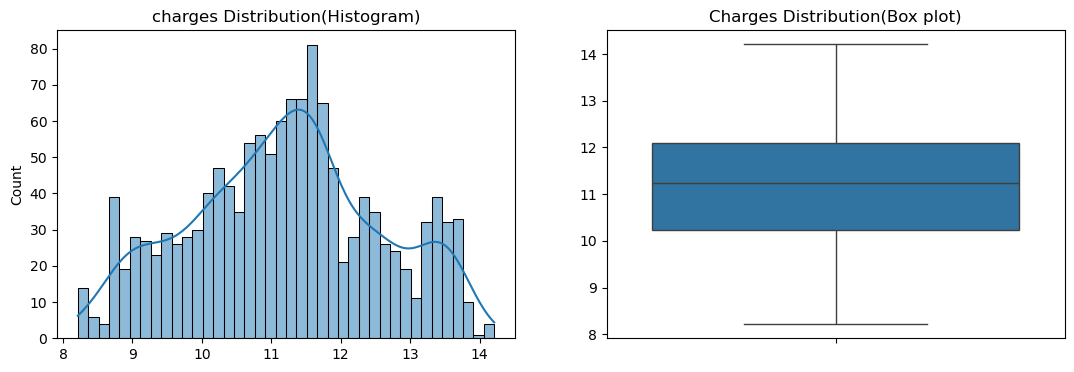

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4))
sns.histplot(y2, bins=40, kde= True, ax=ax1)
# 1. Histogram to visualize the distribution of 'age'
ax1.set_title("charges Distribution(Histogram)")

# 1. Boxplot to visualize the distribution of 'age'
sns.boxplot(y2, ax=ax2)
ax2.set_title("Charges Distribution(Box plot)")
plt.tight_layout
plt.show()

In [18]:
# Find the skewness of the transformed y
stats.skew(y2)

-0.008664562166442579

* A skewness ≈ 0 indicates a nearly symmetric distribution.-0.0087 is very close to 0, meaning the transformed data is not skewed anymore. So, Box-Cox effectively removed the skew, even though the Shapiro-Wilk test still flagged slight non-normality 

### Frequency distributiond for the categorical variables

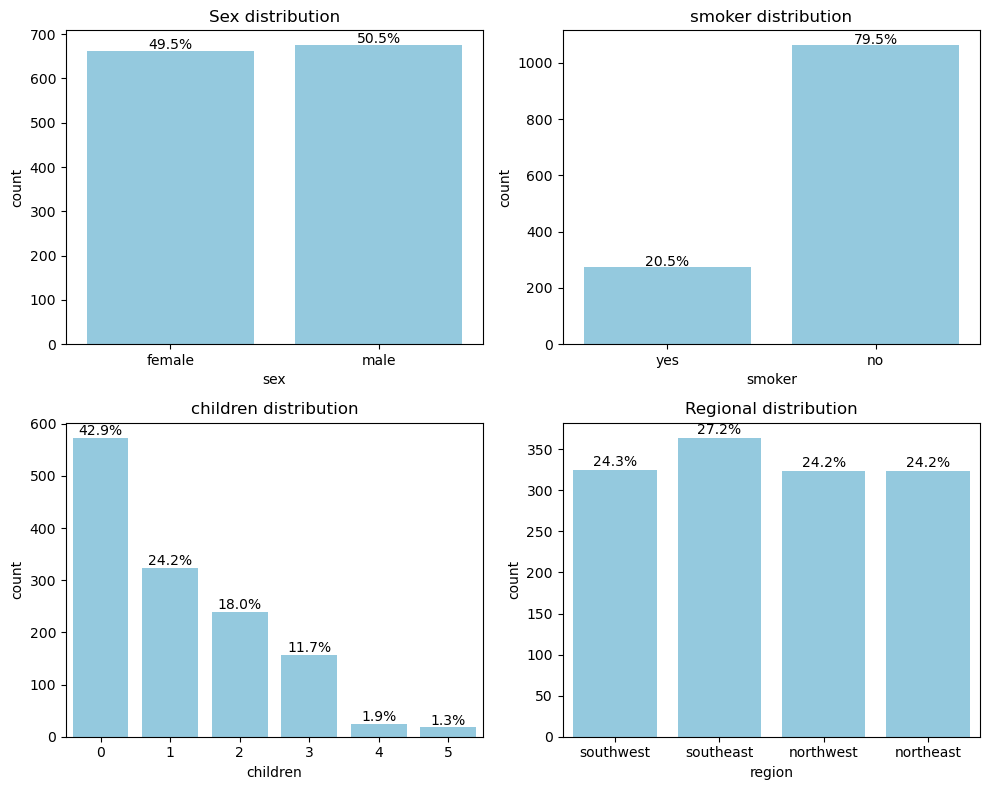

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(10, 8))
ax1,ax2,ax3,ax4 = axes.flatten()
total  = len(df)
# Count plot for the gender
sns.countplot(data= df, x= 'sex', color= "skyblue", ax= axes[0,0])
axes[0,0].set_title("Sex distribution")
# Annotate bars with percentage
for container in axes[0, 0].containers:
    for bar in container:
        height = bar.get_height()
        percent = (height / total) * 100
        axes[0, 0].text(bar.get_x() + bar.get_width() / 2, height + 5,
                        f'{percent:.1f}%', ha='center', fontsize=10)

# Count plot for the smoker
sns.countplot(data= df, x= 'smoker', color= "skyblue", ax= axes[0,1])
axes[0,1].set_title("smoker distribution")
# Annotate bars with percentage
for container in axes[0, 1].containers:
    for bar in container:
        height = bar.get_height()
        percent = (height / total) * 100
        axes[0, 1].text(bar.get_x() + bar.get_width() / 2, height + 5,
                        f'{percent:.1f}%', ha='center', fontsize=10)


# Count plot for the children
sns.countplot(data= df, x= 'children', color= "skyblue", ax= axes[1,0])
axes[1,0].set_title("children distribution")
# Annotate bars with percentage
for container in axes[1, 0].containers:
    for bar in container:
        height = bar.get_height()
        percent = (height / total) * 100
        axes[1, 0].text(bar.get_x() + bar.get_width() / 2, height + 5,
                        f'{percent:.1f}%', ha='center', fontsize=10)

# Count plot for the regions
sns.countplot(data= df, x= 'region', color= "skyblue", ax= axes[1,1])
axes[1,1].set_title("Regional distribution")
# Annotate bars with percentage
for container in axes[1, 1].containers:
    for bar in container:
        height = bar.get_height()
        percent = (height / total) * 100
        axes[1, 1].text(bar.get_x() + bar.get_width() / 2, height + 5,
                        f'{percent:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Bivariate Explolatory Data Analysis

* The correlation between Age and charges

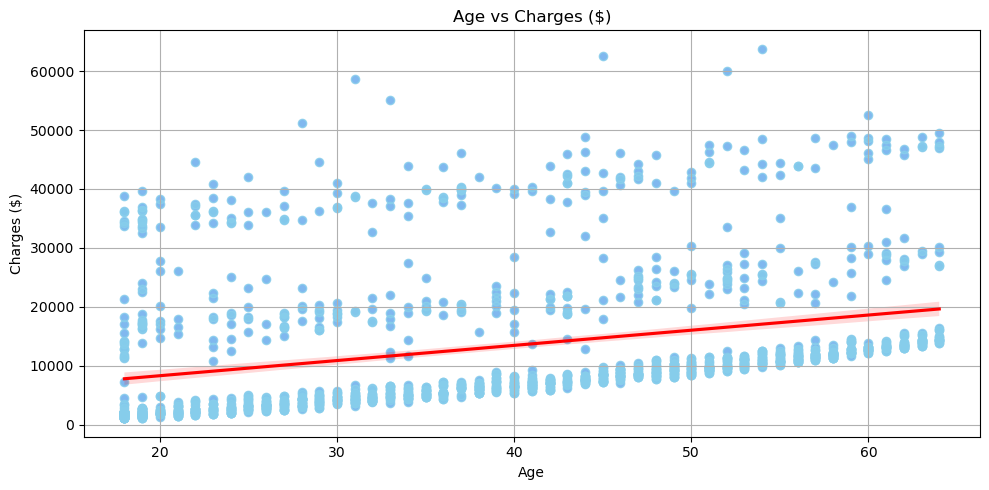

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='age', y='charges', color='blue', alpha=0.6)
sns.regplot(x=df["age"],y=df["charges"],line_kws={"color":"red"},color="skyblue")
plt.xlabel("Age")
plt.ylabel("Charges ($)")
plt.title("Age vs Charges ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

* BMI vs Charges

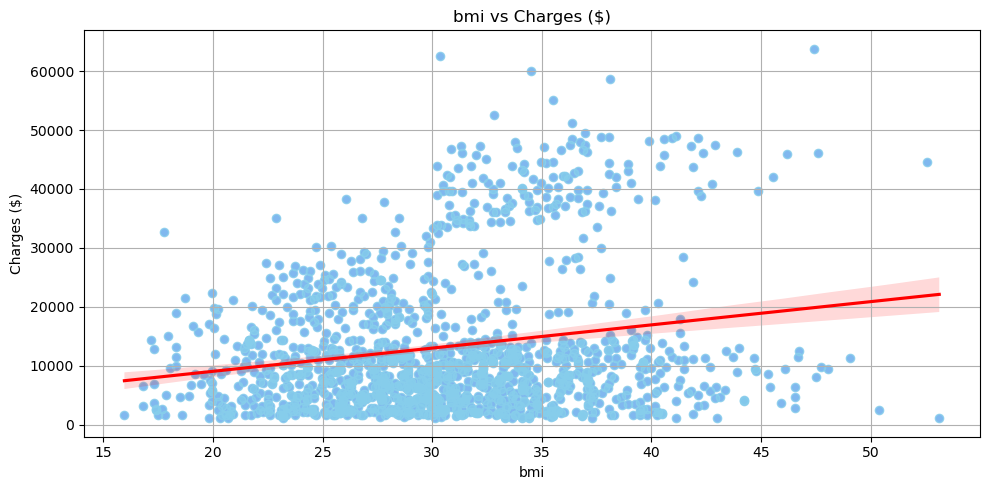

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='bmi', y='charges', color='blue', alpha=0.6)
sns.regplot(x=df["bmi"],y=df["charges"],line_kws={"color":"red"},color="skyblue")
plt.xlabel("bmi")
plt.ylabel("Charges ($)")
plt.title("bmi vs Charges ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

* Childen and charges

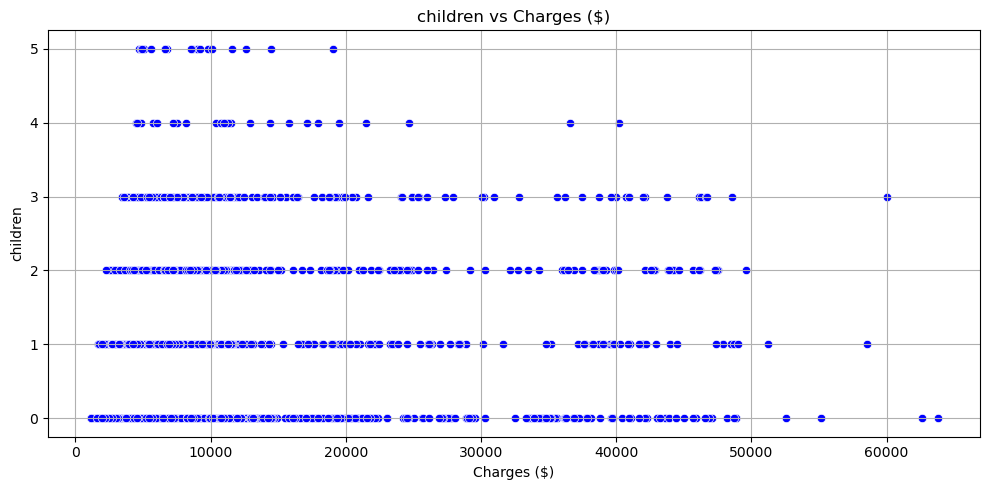

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y='children', x='charges', color='blue')
#sns.regplot(x=df["children"],y=df["charges"],line_kws={"color":"red"},color="skyblue")
plt.ylabel("children")
plt.xlabel("Charges ($)")
plt.title("children vs Charges ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Analyzing the Average Expenditure per Each category

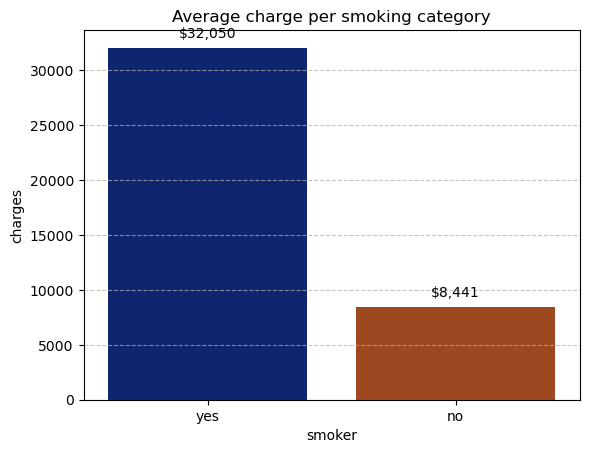

In [23]:
ax=sns.barplot(x= "smoker", y= "charges", data= df, palette = "dark", ci=None)
plt.title("Average charge per smoking category")
# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height ()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.show()

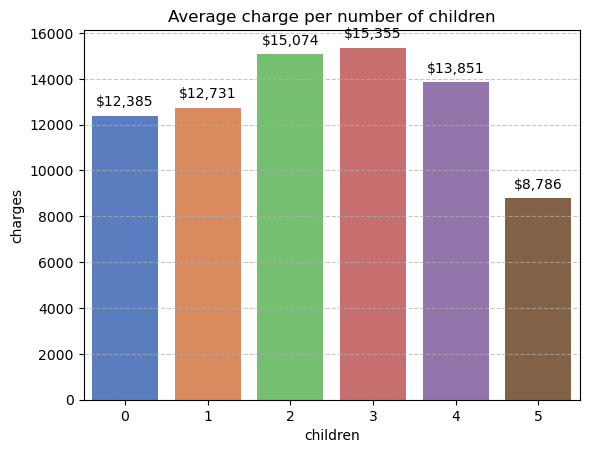

In [24]:
ax=sns.barplot(x= "children", y= "charges", data= df, palette = "muted",ci= None)
plt.title("Average charge per number of children")
# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height ()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.show()

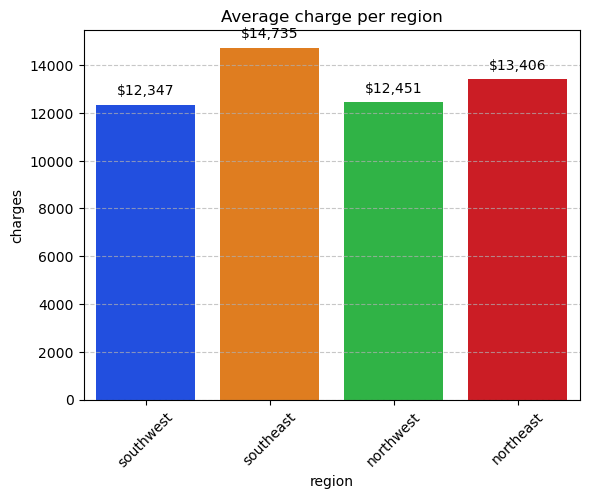

In [25]:
ax=sns.barplot(x= "region", y= "charges", data= df, palette = "bright", ci= None)
plt.title("Average charge per region")
plt.xticks(rotation=45)
# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height ()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.show()

In [26]:
# Creating the Categories based on the standard Ranges
bmi_scale= [0,18.5,25,30,35,40,100]
bmi_labels = ['Under weight', 'Normal', 'Over weight', 'Obese I', 'Obese II', 'ObeseIII']
df['bmi_category']= pd.cut(df['bmi'], bins= bmi_scale, labels= bmi_labels)

#Get the Average Charge per BMI category
average_charges = df.groupby('bmi_category')['charges'].mean().reset_index()

In [27]:
average_charges

,bmi_category,charges
0,Under weight,8657.620652
1,Normal,10435.440719
2,Over weight,10997.803881
3,Obese I,14462.384614
4,Obese II,17022.258883
5,ObeseIII,16784.615546


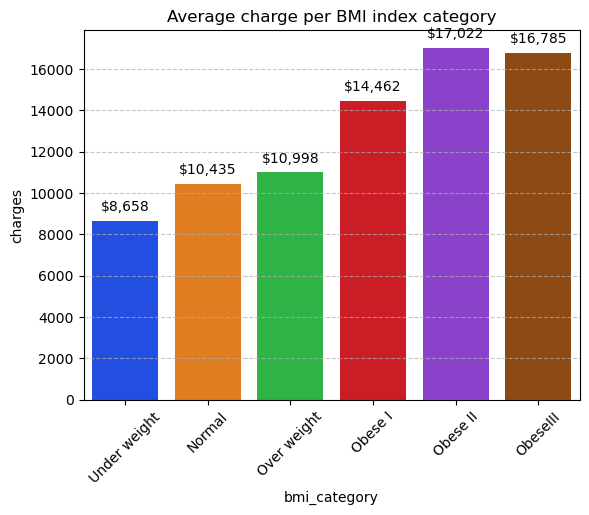

In [28]:
ax=sns.barplot(x= "bmi_category", y= "charges", data= df, palette = "bright", ci= None)
plt.title("Average charge per BMI index category")
plt.xticks(rotation=45)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height ()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.show()

### Heat Map to show the correlation between the variables

In [29]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_category'],
      dtype='object')

Text(0.5, 1.0, 'Heat Map shoing the correlation between the features in the dataset')

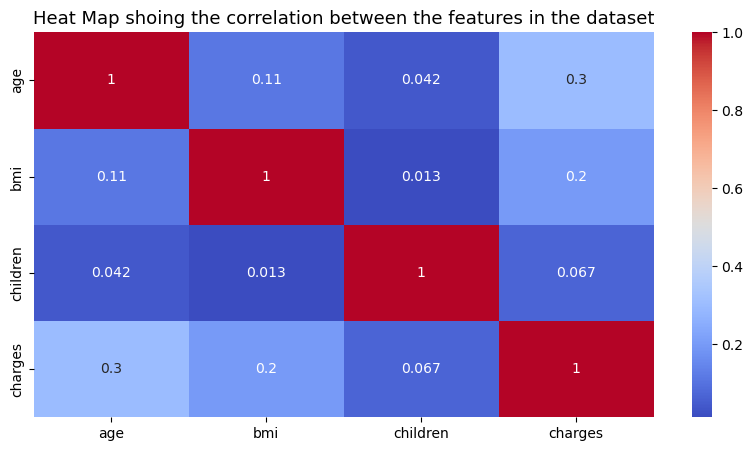

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap= "coolwarm")
plt.title("Heat Map shoing the correlation between the features in the dataset", fontsize= 13)

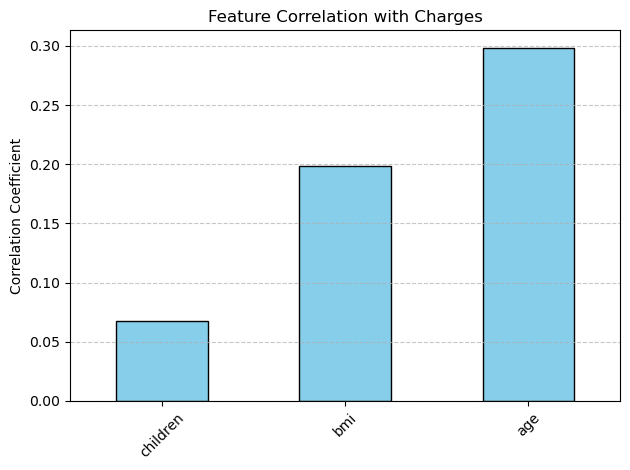

In [31]:
import matplotlib.pyplot as plt

df.corr(numeric_only=True)['charges'][:-1].sort_values().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title("Feature Correlation with Charges")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Categorize the Children

In [32]:
def categorize_children(x):
    if x == 0:
        return 'No Children'
    elif x in [1, 2]:
        return 'Few Children'
    else:
        return 'Many Children'

df['children_category'] = df['children'].apply(categorize_children)

## Encode the categorical variables to get the dummy variables

In [33]:
df = pd.get_dummies(df.drop(['bmi_category', 'children'], axis=1), 
                    columns=['sex', 'smoker', 'region', 'children_category'], 
                    drop_first=True)

In [34]:
df.columns

Index(['age', 'bmi', 'charges', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest',
       'children_category_Many Children', 'children_category_No Children'],
      dtype='object')

In [35]:
df.shape

(1337, 10)

In [36]:
# Getting the X and Y features
X= df.drop("charges", axis=1)
y= df["charges"]

Text(0.5, 1.0, 'Heat Map shoing the correlation between the features in the dataset')

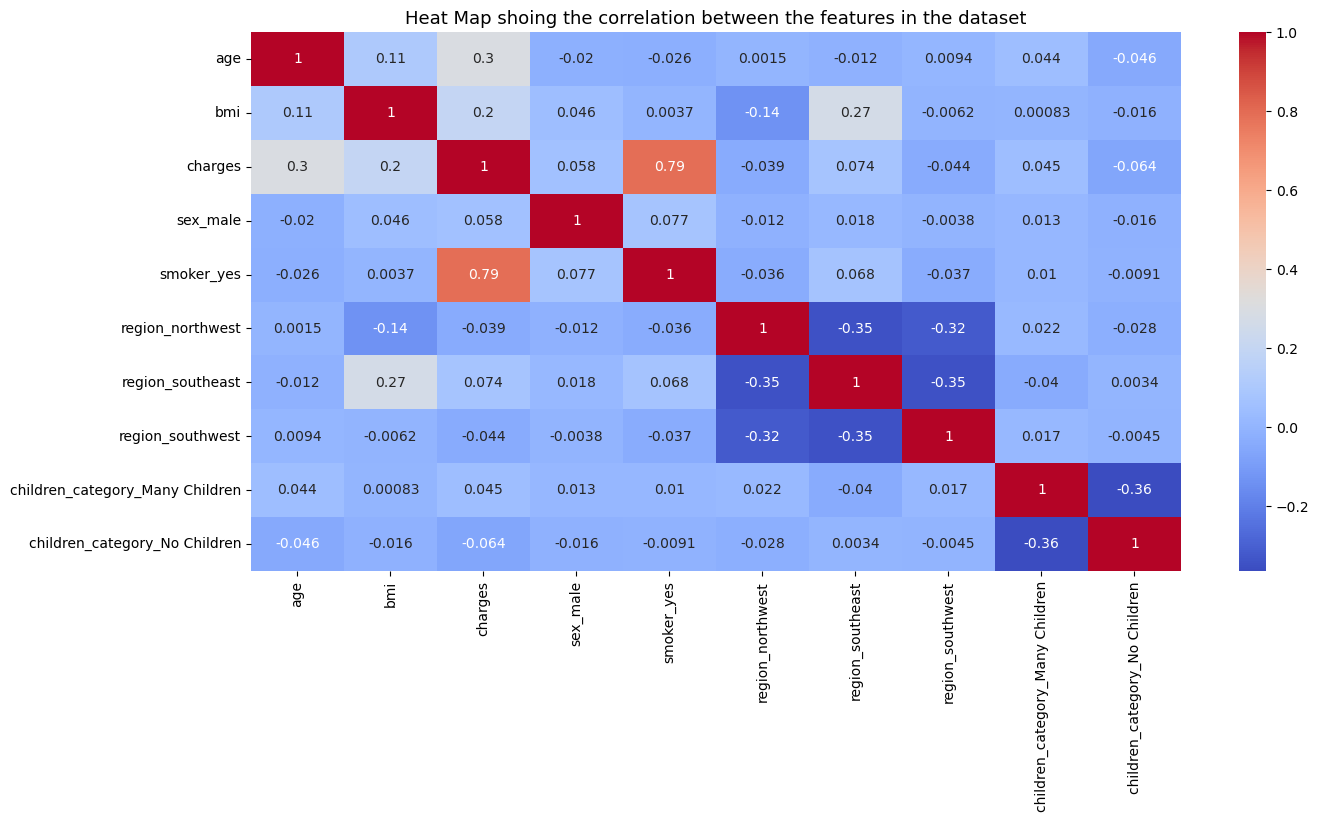

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap= "coolwarm")
plt.title("Heat Map shoing the correlation between the features in the dataset", fontsize= 13)

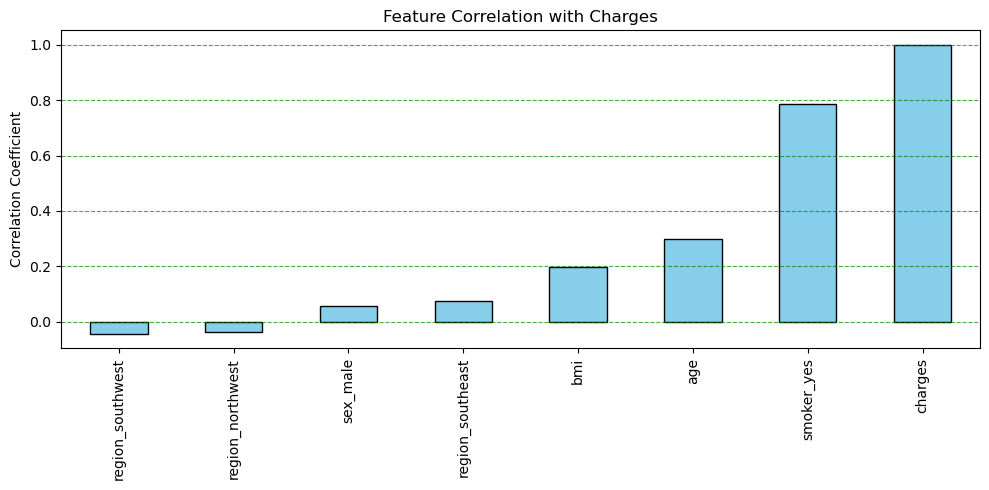

In [38]:
# Visualize the highly correlated features
plt.figure(figsize=(10,5))
df.corr()['charges'][:-2].sort_values().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title("Feature Correlation with Charges")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7, color= "green")
plt.tight_layout()
plt.show()

### Determine the level of colinearity using the variance inflating factor

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X= X.astype(float) # This is added to convert to float

# add the intercept term
X_const= add_constant(X)

# compute the VIF for each variable
vif_data= pd.DataFrame()
vif_data['Features'] = X_const.columns[1:]
vif_data['VIF'] = [variance_inflation_factor(X_const.values,i)
                   for i in range(1,X_const.shape[1])]
#Printb the VIF data
pd.DataFrame(vif_data)

,Features,VIF
0,age,1.018082
1,bmi,1.106704
2,sex_male,1.008936
3,smoker_yes,1.012228
4,region_northwest,1.518116
5,region_southeast,1.653814
6,region_southwest,1.528561
7,children_category_Many Children,1.155179
8,children_category_No Children,1.154902


* There is no multicolinearity since the VIF <10 for all the features

### Fitting the Multiple Linear Regression without any transformations

* The general form of the model is: 𝑌𝑖 =𝛽0 +𝛽1𝑋1𝑖 +𝛽2𝑋2𝑖 +⋯+𝛽𝑘𝑋𝑘𝑖 +𝜖𝑖 
Where:
𝑌𝑖 is the dependent variable,
𝑋1𝑖,
.
.
.
,
𝑋
𝑘
𝑖
X 
1i
​
 ,...,X 
ki
​
  are independent variables (e.g., income, household size, education level),

𝛽
0
,
.
.
.
,
𝛽
𝑘
β 
0
​
 ,...,β 
k
​
  are the model coefficients,

𝜖
𝑖
ϵ 
i
​
  is the random error term.

In [40]:
X = X.apply(lambda x: x.astype(float))

In [41]:
# Spliiting the data in training and testing set
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2, random_state=42)
# Fit an ordinary Least square model
X_p =  sm.add_constant(X_train)
model =  sm.OLS(y_train,X_p).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     316.7
Date:                Fri, 25 Jul 2025   Prob (F-statistic):          4.42e-293
Time:                        16:39:55   Log-Likelihood:                -10833.
No. Observations:                1069   AIC:                         2.169e+04
Df Residuals:                    1059   BIC:                         2.173e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Plot the residuals Vs the predictions

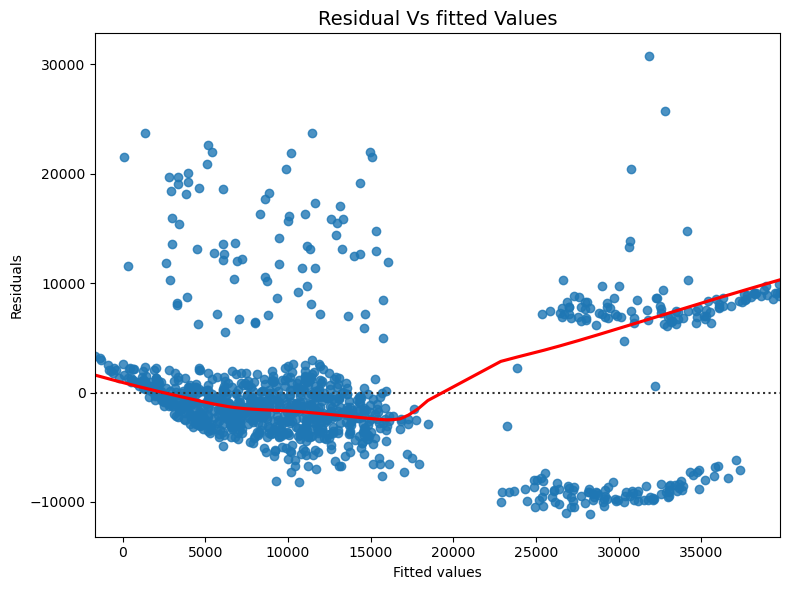

In [42]:
plt.figure(figsize=(8,6))
sns.residplot(x= model.fittedvalues, y= model.resid, lowess=True, line_kws={'color':'red'})
plt.title("Residual Vs fitted Values", fontsize= 14)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

### Create a QQ PLot for the residuals

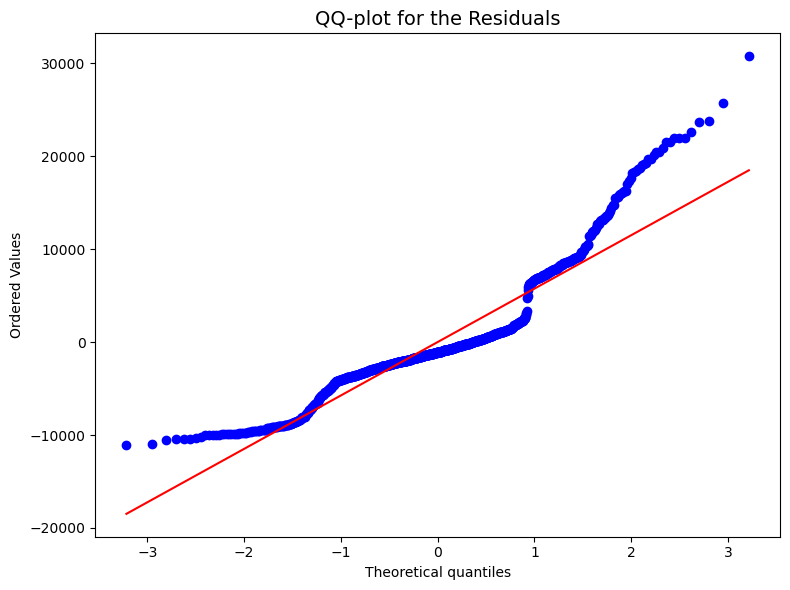

In [43]:
#create a  QQ plot from the residuals
plt.figure(figsize=(8,6))
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("QQ-plot for the Residuals", fontsize= 14)
plt.tight_layout()
plt.show()

#### Standardize the Residuals

In [44]:
stardard_resid = model.resid/np.std(model.resid)
stardard_resid

1114    0.016484
968     0.011806
599     3.140990
170    -0.549034
275    -0.053156
          ...   
1096    1.292141
1131   -1.105681
1295    0.140862
861    -0.117034
1127   -0.542114
Length: 1069, dtype: float64

### Plot the standardized Residuals

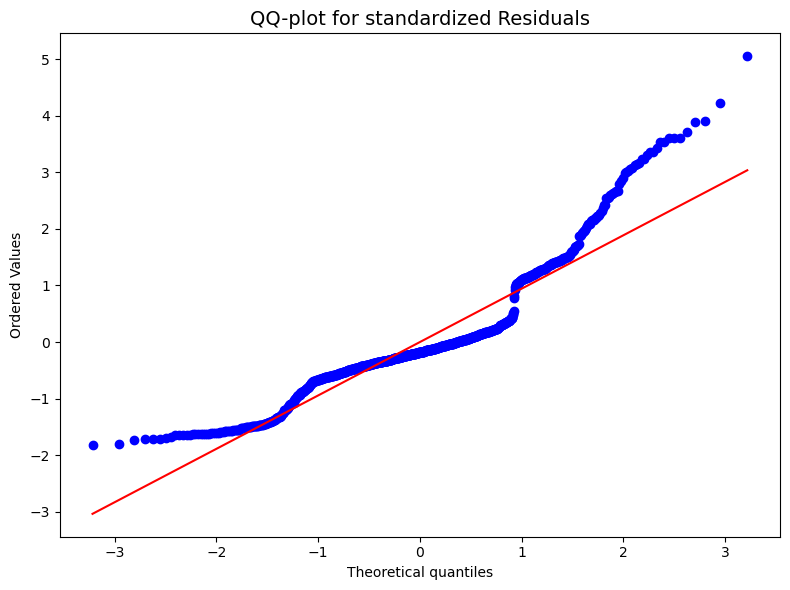

In [45]:
#create a  QQ plot from the residuals
plt.figure(figsize=(8,6))
stats.probplot(stardard_resid, dist="norm", plot= plt)
plt.title("QQ-plot for standardized Residuals", fontsize= 14)
plt.tight_layout()
plt.show()

### Check fpor the Normality and Heteroscedasticity

In [46]:
# Check for the Normality
from scipy.stats import shapiro
shapiro_test = shapiro(model.resid)
print("Shapiro-Wilk Test:", shapiro_test)

Shapiro-Wilk Test: ShapiroResult(statistic=0.885646004402609, pvalue=2.266583358216587e-27)


* The W statistic = 0.8856, which is quite far from 1 and The p-value < 0.05.The residuals are not normally distributed hence this violates the normality assumption of linear regression.

In [47]:
# Check for the Heroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
print("Breusch-pagan P-value:", bp_test[1])

Breusch-pagan P-value: 5.558665207611054e-16


* The p-value <0.05, this implies that the model suffers from heteroscedasticity, i.e., the variance of residuals is not constant across all levels of the predictors. Another Key assumption of Linear regression violated

## Prediction on the test data

In [48]:
X_test1= sm.add_constant(X_test)
y_pred= model.predict(X_test1)
residual= y_test-y_pred
#Evaluate model perfomance on testing
mse= mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)
r_squared = r2_score(y_test,y_pred)
adj_r_squared = 1-(1-r_squared)*(X_test1.shape[0]-1/X_test1.shape[0]-X_test1.shape[1]-1)

#print the Evaluation metrics on the training set
print("Testing Set:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Adj_R-squared:", adj_r_squared)
                

Testing Set:
Mean Squared Error: 35397807.66839767
Root Mean Squared Error: 5949.605673353291
R-squared: 0.8073652270845304
Adj_R-squared: -48.50641785280959


## scaling and Tranforming the dataseset

In [49]:
from sklearn.preprocessing import StandardScaler
numeric_cols= ['age', 'bmi']
scaler= StandardScaler()
X[numeric_cols]= scaler.fit_transform(X[numeric_cols])

#Normalize the Y
Y= y2- np.mean(y2)/np.std(y2)
X

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_category_Many Children,children_category_No Children
0,-1.440418,-0.453160,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-1.511647,0.509422,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.799350,0.383155,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.443201,-1.305052,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.514431,-0.292456,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1333,0.767704,0.050269,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1334,-1.511647,0.206053,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1335,-1.511647,1.014490,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1336,-1.297958,-0.797524,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Fitting MLR with the transformed data

## Assess the Hat Matrix

In [50]:
H = X.values @ (np.linalg.inv(X.values.T @ X.values)) @ X.values.T
pd.DataFrame(np.diag(H)).apply(lambda x : x>(2*10/1337)).value_counts()
points=np.where(pd.DataFrame(np.diag(H))>(2*10/1337))[0] # >2*(p+1)/n (flag condition)

In [51]:
X.iloc[points,:]

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_category_Many Children,children_category_No Children
1047,-1.226729,3.593945,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1317,-1.511647,3.684136,1.0,0.0,0.0,1.0,0.0,0.0,1.0


* Two points are found having unusual x coordinate( high leverage)

### Use Crook's Distrance to identify the leverage points

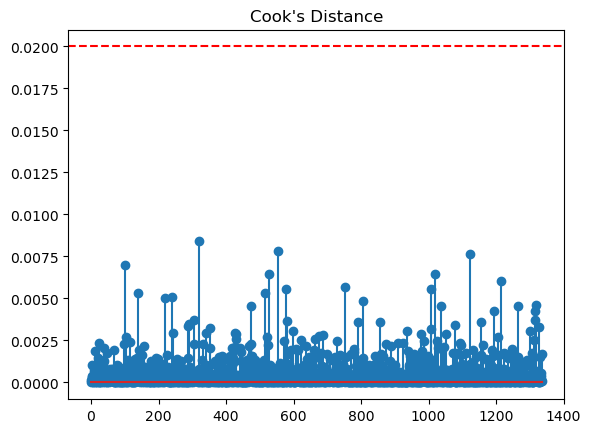

In [52]:
model = sm.OLS(Y,X).fit()

influence = model.get_influence()
cooks_d, _ = influence.cooks_distance

#Check for the High Values
plt.stem(cooks_d)
plt.axhline(0.02, color= 'red', linestyle = '--')
plt.title("Cook's Distance")
plt.show()

* Since all the points are having Cook D < 0.02 << 1, hence no influential point present in the dataset.

#### Fit the model for the Tranformed Data

In [53]:
# Spliiting the data in training and testing set
X_train,X_test,y_train,y_test  = train_test_split(X,Y,test_size=0.2, random_state=42)
# Fit an ordinary Least square model
X_p =  sm.add_constant(X_train)
model =  sm.OLS(y_train,X_p).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     353.2
Date:                Fri, 25 Jul 2025   Prob (F-statistic):          1.48e-311
Time:                        16:39:57   Log-Likelihood:                -1092.5
No. Observations:                1069   AIC:                             2205.
Df Residuals:                    1059   BIC:                             2255.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Plot the residual vs the predicted values

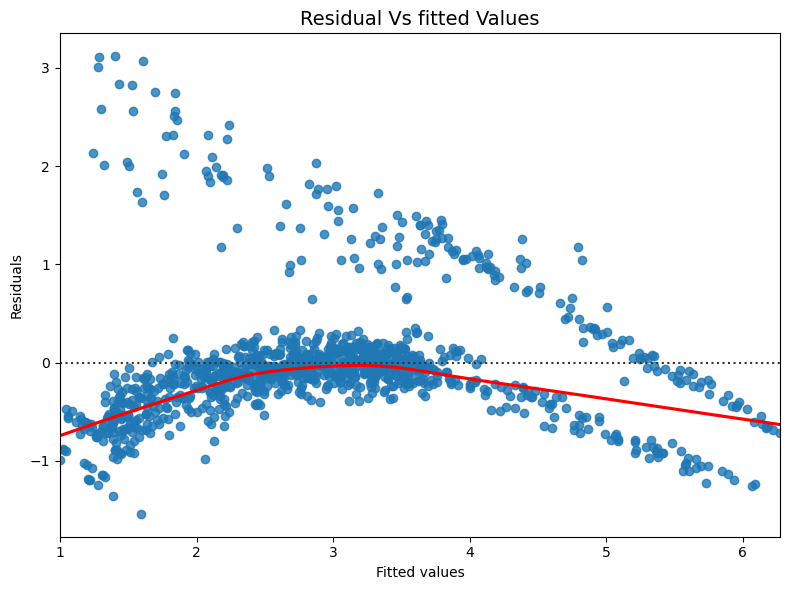

In [54]:
plt.figure(figsize=(8,6))
sns.residplot(x= model.fittedvalues, y= model.resid, lowess=True, line_kws={'color':'red'})
plt.title("Residual Vs fitted Values", fontsize= 14)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

### QQ plot for the residuals

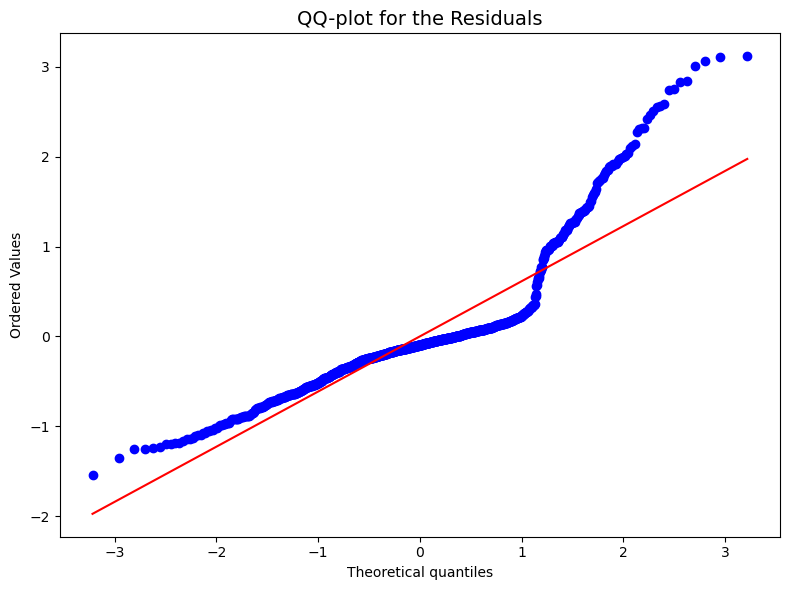

In [55]:
#create a  QQ plot from the residuals
plt.figure(figsize=(8,6))
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("QQ-plot for the Residuals", fontsize= 14)
plt.tight_layout()
plt.show()

### Prediction on the Test Data

In [56]:
X_test1= sm.add_constant(X_test)
y_pred= model.predict(X_test1)
residual= y_test-y_pred
#Evaluate model perfomance on testing
mse= mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)
r_squared = r2_score(y_test,y_pred)
adj_r_squared = 1-(1-r_squared)*(X_test1.shape[0]-1/X_test1.shape[0]-X_test1.shape[1]-1)

#print the Evaluation metrics on the training set
print("Testing Set:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Adj_R-squared:", adj_r_squared)

Testing Set:
Mean Squared Error: 0.34198463857312666
Root Mean Squared Error: 0.5847945267981965
R-squared: 0.8334864018205178
Adj_R-squared: -41.79337341273074


### Perfom a 10 fold cross validation (for better estimate of model perfomance) 

In [57]:
from sklearn.model_selection import KFold, cross_val_score
# Model with intercept
model = LinearRegression(fit_intercept=True)

# Define predictors and response
x = X
y = Y  # Make sure Y is defined as df['charges'] or your target column

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold CV with R² as the metric
r2_scores = cross_val_score(model, x, y, cv=kf, scoring='r2')

# Compute average R²
mean_r2 = np.mean(r2_scores)

# Compute Adjusted R² manually
n = x.shape[0]  # number of observations
k = x.shape[1]  # number of predictors

adj_r2 = 1 - (1 - mean_r2) * (n - 1) / (n - k - 1)

# Display results
print(f"R² scores for each fold: {r2_scores}")
print(f"Mean R²: {mean_r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")

R² scores for each fold: [0.84776642 0.81489595 0.69651047 0.74459442 0.78322051 0.72316062
 0.7192197  0.75361519 0.76542915 0.77844902]
Mean R²: 0.7627
Adjusted R²: 0.7611


### Polynomial Regression
* Since the residual plot was showing the curve, its a strong indiaction that the model is not capturing the full model in the data. By adding a sauared, cubic or interaction terms, the polyno,ial regression can bend the regression line to better fit the data leading to reduced residual curvature and improved fit

In [58]:
# Assess the best model complexity
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_train,X_test,y_train,y_test  = train_test_split(x,y,test_size=0.2, random_state=42)
# Fit an ordinary Least square model
X_p =  sm.add_constant(X_train)
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

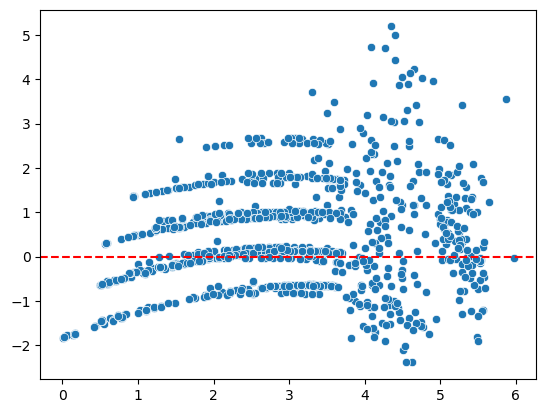

In [59]:
train_pred= model.predict(X_train)
test_pred = model.predict(X_test)
res= y_train-train_pred
sns.scatterplot(x= y_train, y= res)
plt.axhline(y=0, color= 'red', ls= 'dashed')

### Choosing the suitbale model complexity

In [60]:
train_rmse_error= []
test_rmse_error= []

for degree1 in range (1,6):
    poly_conv= PolynomialFeatures(degree=degree1, include_bias=False)
    poly_features= poly_conv.fit_transform(x)
    # train the model 
    X_train,X_test,y_train,y_test=train_test_split(poly_features,y, test_size=0.2, random_state=42)
    model= LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    # Predict on the split data
    train_pred= model.predict(X_train)
    test_pred= model.predict(X_test)
    # RMSE
    train_RMSE= np.sqrt(mean_squared_error(y_train, train_pred))
    test_RMSE= np.sqrt(mean_squared_error(y_test,test_pred))
    # append
    train_rmse_error.append(train_RMSE)
    test_rmse_error.append(test_RMSE)

In [61]:
test_rmse_error

[0.5847945267981971,
 0.48446784671506005,
 0.5333179046584581,
 0.690188250899919,
 2.297256539505214]

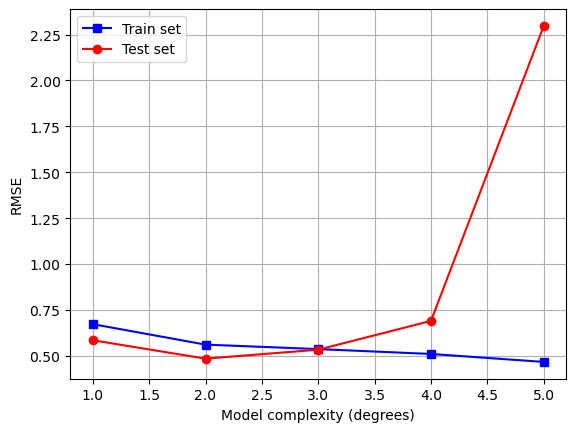

In [62]:
#ploting the errors vs the complexity
plt.plot(range(1,6), train_rmse_error, color= 'blue', marker= 's', label= 'Train set')
plt.plot(range(1,6), test_rmse_error, color= 'red', marker= 'o', label= 'Test set')
plt.xlabel("Model complexity (degrees)")
plt.ylabel("RMSE")
plt.grid()
plt.legend()
plt.show()

* We can observe that the best model co,plexity for our model is degree 3

In [63]:
# Step 1: Define your numeric columns
poly_cols = ['age', 'bmi','smoker_yes']  # Only apply to these

# Step 2: Isolate the numeric part of X
X_poly_base = X[poly_cols]

# Step 3: Fit and transform using PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_array = poly.fit_transform(X_poly_base)

# Step 4: Get new feature names
poly_feature_names = poly.get_feature_names_out(poly_cols)

# Step 5: Create DataFrame with polynomial terms
X_poly_df = pd.DataFrame(X_poly_array, columns=poly_feature_names, index=X.index)

# Step 6: Concatenate with the rest of X
X_rest = X.drop(columns=poly_cols)
X_transformed = pd.concat([X_poly_df, X_rest], axis=1)

# View the transformed DataFrame
X_transformed.head()


,age,bmi,smoker_yes,age^2,age bmi,age smoker_yes,bmi^2,bmi smoker_yes,smoker_yes^2,age^3,...,bmi^3,bmi^2 smoker_yes,bmi smoker_yes^2,smoker_yes^3,sex_male,region_northwest,region_southeast,region_southwest,children_category_Many Children,children_category_No Children
0,-1.440418,-0.453160,1.0,2.074803,0.652739,-1.440418,0.205354,-0.45316,1.0,-2.988583,...,-0.093058,0.205354,-0.45316,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.511647,0.509422,0.0,2.285078,-0.770066,-0.000000,0.259510,0.00000,0.0,-3.454232,...,0.132200,0.000000,0.00000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.799350,0.383155,0.0,0.638961,-0.306275,-0.000000,0.146807,0.00000,0.0,-0.510753,...,0.056250,0.000000,0.00000,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.443201,-1.305052,0.0,0.196427,0.578401,-0.000000,1.703161,-0.00000,0.0,-0.087057,...,-2.222714,0.000000,-0.00000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.514431,-0.292456,0.0,0.264639,0.150449,-0.000000,0.085531,-0.00000,0.0,-0.136139,...,-0.025014,0.000000,-0.00000,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [64]:
X_transformed=X_transformed.drop('smoker_yes^2', axis=1)

In [65]:
X_transformed.head()

,age,bmi,smoker_yes,age^2,age bmi,age smoker_yes,bmi^2,bmi smoker_yes,age^3,age^2 bmi,...,bmi^3,bmi^2 smoker_yes,bmi smoker_yes^2,smoker_yes^3,sex_male,region_northwest,region_southeast,region_southwest,children_category_Many Children,children_category_No Children
0,-1.440418,-0.453160,1.0,2.074803,0.652739,-1.440418,0.205354,-0.45316,-2.988583,-0.940217,...,-0.093058,0.205354,-0.45316,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.511647,0.509422,0.0,2.285078,-0.770066,-0.000000,0.259510,0.00000,-3.454232,1.164068,...,0.132200,0.000000,0.00000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.799350,0.383155,0.0,0.638961,-0.306275,-0.000000,0.146807,0.00000,-0.510753,0.244821,...,0.056250,0.000000,0.00000,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.443201,-1.305052,0.0,0.196427,0.578401,-0.000000,1.703161,-0.00000,-0.087057,-0.256348,...,-2.222714,0.000000,-0.00000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.514431,-0.292456,0.0,0.264639,0.150449,-0.000000,0.085531,-0.00000,-0.136139,-0.077395,...,-0.025014,0.000000,-0.00000,0.0,1.0,1.0,0.0,0.0,0.0,1.0


### Asess the Hat Matrix

In [66]:
H = X_transformed.values @ (np.linalg.inv(X_transformed.values.T @ X_transformed.values)) @ X_transformed.values.T
pd.DataFrame(np.diag(H)).apply(lambda x : x>(2*15/1337)).value_counts()
points_=np.where(pd.DataFrame(np.diag(H))>(2*25/1337))[0] # >2*(p+1)/n (flag condition)

In [67]:
X_transformed.iloc[points_,:]

,age,bmi,smoker_yes,age^2,age bmi,age smoker_yes,bmi^2,bmi smoker_yes,age^3,age^2 bmi,...,bmi^3,bmi^2 smoker_yes,bmi smoker_yes^2,smoker_yes^3,sex_male,region_northwest,region_southeast,region_southwest,children_category_Many Children,children_category_No Children
28,-1.155499,-2.177443,0.0,1.335177,2.516032,-0.000000,4.741257,-0.000000,-1.542796,-2.907272,...,-10.323815,0.000000,-0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0
39,1.480002,1.514639,1.0,2.190405,2.241667,1.480002,2.294130,1.514639,3.241803,3.317672,...,3.474777,2.294130,1.514639,1.0,1.0,0.0,0.0,1.0,0.0,1.0
98,1.195083,-1.756826,1.0,1.428223,-2.099552,1.195083,3.086437,-1.756826,1.706844,-2.509138,...,-5.422332,3.086437,-1.756826,1.0,1.0,0.0,0.0,0.0,0.0,1.0
116,1.337542,3.016724,0.0,1.789019,4.034996,0.000000,9.100626,0.000000,2.392888,5.396977,...,27.454081,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0
128,-0.514431,-2.115129,1.0,0.264639,1.088088,-0.514431,4.473771,-2.115129,-0.136139,-0.559746,...,-9.462603,4.473771,-2.115129,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,1.764921,1.032528,1.0,3.114945,1.822330,1.764921,1.066114,1.032528,5.497630,3.216268,...,1.100793,1.066114,1.032528,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1265,1.764921,-1.132050,1.0,3.114945,-1.997978,1.764921,1.281537,-1.132050,5.497630,-3.526273,...,-1.450764,1.281537,-1.132050,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1282,-1.511647,-1.476415,1.0,2.285078,2.231818,-1.511647,2.179800,-1.476415,-3.454232,-3.373723,...,-3.218289,2.179800,-1.476415,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1284,1.551231,0.924299,1.0,2.406319,1.433802,1.551231,0.854329,0.924299,3.732757,2.224158,...,0.789655,0.854329,0.924299,1.0,1.0,0.0,0.0,1.0,0.0,0.0


* we observe that 139 points are having levarage points(unusual x axis values)

### Use Cook's Distance to indentify the leverage

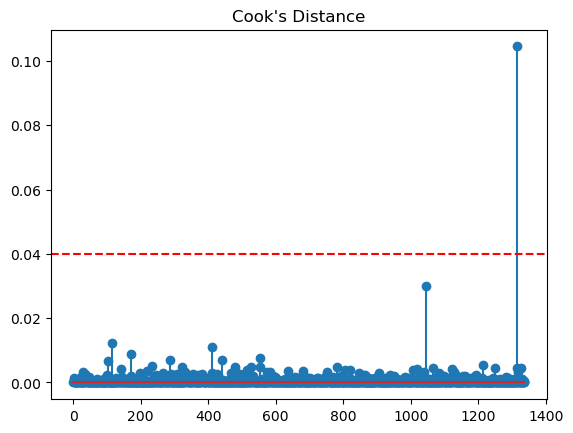

In [68]:
model = sm.OLS(Y,X_transformed).fit()

influence = model.get_influence()
cooks_d, _ = influence.cooks_distance

#Check for the High Values
plt.stem(cooks_d)
plt.axhline(0.04, color= 'red', linestyle = '--')
plt.title("Cook's Distance")
plt.show()

In [69]:
points

array([1046, 1316], dtype=int64)

we observe that there are two influencial point 

## Leverage & Standardized Residuals
*Helps identify points with unusual predictor values (leverage) or large errors (residuals).

<Figure size 1500x800 with 0 Axes>

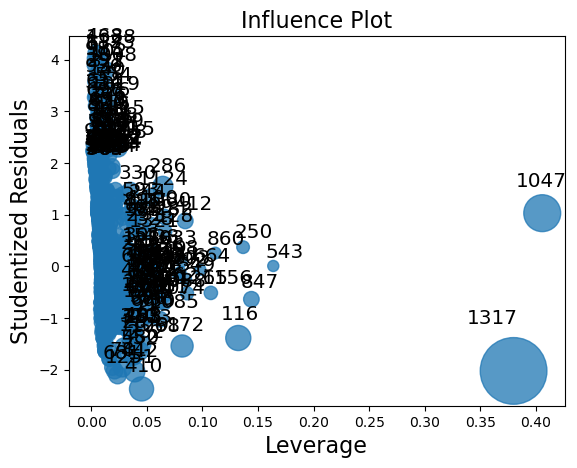

In [70]:
plt.figure(figsize=(15,8))
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model, criterion="cooks")
plt.show()


### identify  the influencial points

In [71]:
# Identify influential indices (e.g., Cook’s D > 4/n)
influential_points = np.where(cooks_d > 4 / len(X))[0]

In [72]:
print("The influential points are:",influential_points)

The influential points are: [  28  102  116  140  172  198  219  232  286  321  330  410  442  468
  480  516  526  552  554  573  583  636  680  753  780  805  820 1007
 1018 1038 1046 1067 1123 1128 1214 1250 1314 1316 1317 1327]


### fIt the polynomial Regression

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.2, random_state=42)
X_transformed1 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_transformed1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     218.9
Date:                Fri, 25 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:40:28   Log-Likelihood:                -933.13
No. Observations:                1069   AIC:                             1910.
Df Residuals:                    1047   BIC:                             2020.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [74]:
# Get the regression coefficients
model.params 

const                              2.866729
age                                0.785770
bmi                                0.038432
smoker_yes                         1.108282
age^2                             -0.069117
age bmi                            0.001430
age smoker_yes                    -0.346785
bmi^2                             -0.018939
bmi smoker_yes                     0.250009
age^3                              0.020056
age^2 bmi                         -0.004180
age^2 smoker_yes                   0.118221
age bmi^2                          0.023616
age bmi smoker_yes                -0.063488
age smoker_yes^2                  -0.346785
bmi^3                             -0.010382
bmi^2 smoker_yes                  -0.034183
bmi smoker_yes^2                   0.250009
smoker_yes^3                       1.108282
sex_male                          -0.118421
region_northwest                  -0.070854
region_southeast                  -0.161889
region_southwest                

### Compute the studendized residuals to help detect influential or outlying observations

In [75]:
# Get the predicted (fitted) values from your model
fitted_values = model.fittedvalues

# Get the externally studentized residuals
studentized_residuals  = model.get_influence().resid_studentized_external

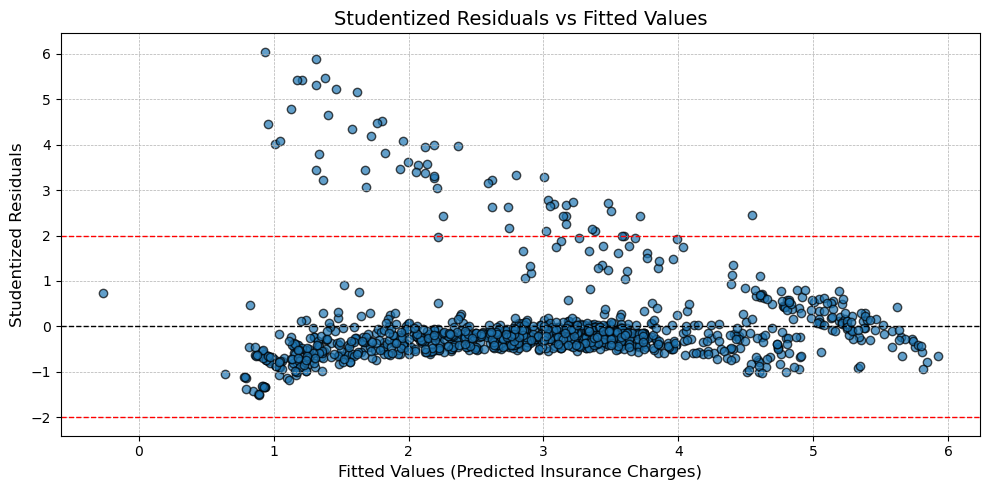

In [76]:
plt.figure(figsize=(10, 5))
plt.scatter(fitted_values, studentized_residuals, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=2, color='red', linestyle='--', linewidth=1)
plt.axhline(y=-2, color='red', linestyle='--', linewidth=1)

plt.title('Studentized Residuals vs Fitted Values', fontsize=14)
plt.xlabel('Fitted Values (Predicted Insurance Charges)', fontsize=12)
plt.ylabel('Studentized Residuals', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [77]:
### A summary of all influencial points
influence = model.get_influence()

#Create a DataFrame with all relevant influence metrics
influence_summary = pd.DataFrame({
    "Fitted_Values": model.fittedvalues,
    "Residuals": model.resid,
    "Studentized_Residuals": influence.resid_studentized_external,
    "Hat_Values": influence.hat_matrix_diag,
    "DFBETAS": influence.dfbetas.max(axis=1),  # max dfbeta across predictors
    "DFFITS": influence.dffits[0],
    "Cooks_Distance": influence.cooks_distance[0],
    "Leverage": influence.hat_matrix_diag
})
# Sort by Cook's Distance or Studentized Residuals to flag influential points
influence_summary_sorted = influence_summary.sort_values(by="Cooks_Distance", ascending=False)

# Display top 10 most influential observations
influence_summary_sorted.head(10)

,Fitted_Values,Residuals,Studentized_Residuals,Hat_Values,DFBETAS,DFFITS,Cooks_Distance,Leverage
1027,1.208101,3.080864,5.418832,0.030840,0.454663,0.966633,0.036389,0.030840
1215,0.959308,2.541850,4.455632,0.032870,0.342623,0.821425,0.026512,0.032870
516,1.316960,3.359820,5.878618,0.015907,0.337504,0.747387,0.021650,0.015907
430,0.939185,3.452776,6.042873,0.014649,0.288539,0.736806,0.021003,0.014649
1080,1.048619,2.330085,4.070144,0.029074,0.286027,0.704315,0.019552,0.029074
102,1.171204,3.099749,5.411090,0.016189,0.318809,0.694120,0.018765,0.016189
1039,1.312187,3.039754,5.301537,0.015474,0.349085,0.664648,0.017224,0.015474
526,1.460354,2.995835,5.223822,0.015803,0.362347,0.661945,0.017098,0.015803
1317,-0.268580,0.322571,0.729283,0.429157,0.314533,0.632333,0.016001,0.429157
1195,1.584355,2.494392,4.342973,0.020612,0.312928,0.630041,0.015612,0.020612


### Make prediction on the test set data

In [78]:
X_test1=sm.add_constant(X_test)
y_pred = model.predict(X_test1)
res=y_test-y_pred
# Evaluate the model performance on the testing set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
# Compute Adjusted R² manually
n = x.shape[0]  # number of observations
k = x.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

#print the Evaluation metrics on the training set
print("Testing Set:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Adj_R-squared:", adj_r2)

Testing Set:
Mean Squared Error: 0.24838182924837543
Root Mean Squared Error: 0.4983792022630714
R-squared: 0.8790619593818249
Adj_R-squared: 0.8782417315253338


## Perfom the cross Validation on the dataset with 20 folds

In [79]:
# Model with intercept
lm = LinearRegression(fit_intercept=True)

# Define predictors and response
x = X_transformed
y = Y  # Make sure Y is defined as df['charges'] or your target column

# Set up 10-fold cross-validation
kf = KFold(n_splits=20, shuffle=True, random_state=42)

# Perform 20-fold CV with R² as the metric
r2_scores = cross_val_score(lm, x, y, cv=kf, scoring='r2')

# Compute average R²
mean_r2 = np.mean(r2_scores)

# Compute Adjusted R² manually
n = x.shape[0]  # number of observations
k = x.shape[1]  # number of predictors

adj_r2 = 1 - (1 - mean_r2) * (n - 1) / (n - k - 1)
# Display results
print(f"R² scores for each fold: {r2_scores}")
print()
print(f"Mean R²: {mean_r2:.4f}")
print()
print(f"average Adjusted R²: {adj_r2:.4f}")

R² scores for each fold: [0.93448464 0.88598712 0.85147496 0.83843233 0.84767554 0.60427536
 0.7188251  0.93534482 0.85398588 0.86749823 0.77933798 0.7436349
 0.78420524 0.82978699 0.84143832 0.81753406 0.86560765 0.7807046
 0.7587438  0.89905657]

Mean R²: 0.8219

average Adjusted R²: 0.8186


* After performing 20-fold cross-validation, the Adjusted R-squared increased to 81.7%, which is notably higher than the value obtained from 10-fold cross-validation. This suggests that the model generalizes better under a finer partitioning of the data, indicating improved model stability and reduced variance in prediction performance. 

### Model Diagnostics

* Linearity

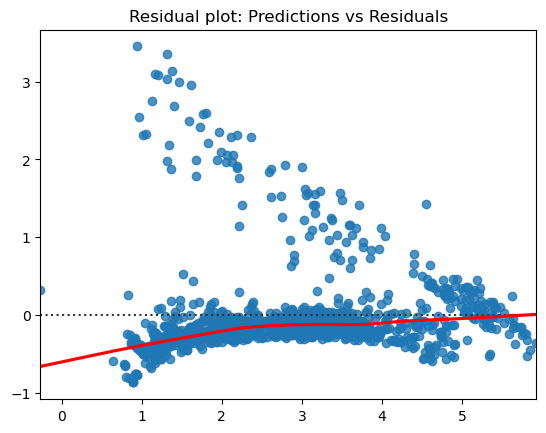

In [80]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residual plot: Predictions vs Residuals')
plt.show()

* Multicollinearity

In [81]:
# Add constant to predictor matrix
X_vif = sm.add_constant(X_transformed)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print(vif_data)


                            feature       VIF
0                             const  8.948096
1                               age  7.397349
2                               bmi  4.410974
3                        smoker_yes       inf
4                             age^2  1.553627
5                           age bmi  1.379645
6                    age smoker_yes       inf
7                             bmi^2  1.782774
8                    bmi smoker_yes       inf
9                             age^3  6.841798
10                        age^2 bmi  2.465623
11                 age^2 smoker_yes  2.544057
12                        age bmi^2  1.729170
13               age bmi smoker_yes  1.301552
14                 age smoker_yes^2       inf
15                            bmi^3  3.377768
16                 bmi^2 smoker_yes  2.007903
17                 bmi smoker_yes^2       inf
18                     smoker_yes^3       inf
19                         sex_male  1.018437
20                 region_northwes

In [82]:
X= X.astype(float) # This is added to convert to float

# add the intercept term
X_const= add_constant(X)

# compute the VIF for each variable
vif_data= pd.DataFrame()
vif_data['Features'] = X_const.columns[1:]
vif_data['VIF'] = [variance_inflation_factor(X_const.values,i)
                   for i in range(1,X_const.shape[1])]
#Printb the VIF data
pd.DataFrame(vif_data)

,Features,VIF
0,age,1.018082
1,bmi,1.106704
2,sex_male,1.008936
3,smoker_yes,1.012228
4,region_northwest,1.518116
5,region_southeast,1.653814
6,region_southwest,1.528561
7,children_category_Many Children,1.155179
8,children_category_No Children,1.154902


* All VIFs<5 hence Multicollinearity is not suspected.

* Indepence errors

In [83]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Fit a regression model
X = sm.add_constant(X_transformed)
model = sm.OLS(Y, X).fit()

# Durbin-Watson test
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")

Durbin-Watson Statistic: 1.9814


* Durbin-Watson Statistic: 1.9814(close to 2) indicates that residuals are not significantly autocorrelated hence Independence of errors is satisfied.

* Homoscedasticity

In [84]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
print("Breusch-Pagan p-value:", bp_test[1])

Breusch-Pagan p-value: 1.9515239480510353e-08


* Breusch-Pagan p-value: 1.9515239480510353e-08 << 0.05 hence H0 is rejected and hence not Homoscedastic.

* Normality

In [85]:
from scipy.stats import shapiro

shapiro_test = shapiro(model.resid)
print("Shapiro-Wilk Test:", shapiro_test)

Shapiro-Wilk Test: ShapiroResult(statistic=0.6257183682102683, pvalue=5.153771790819818e-47)


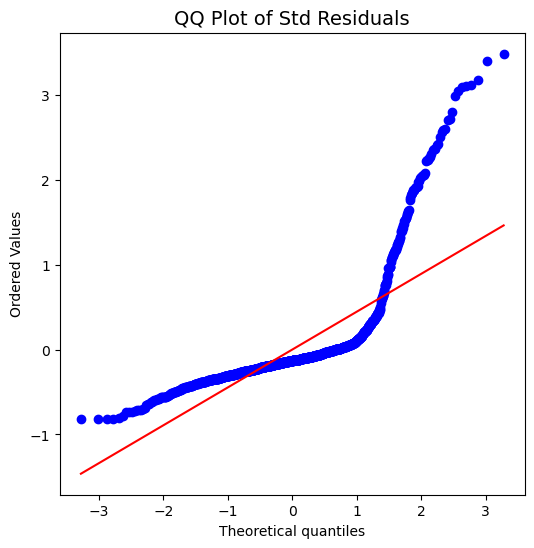

In [86]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create the QQ plot for standard residuals
plt.figure(figsize=(6, 6))
stats.probplot(model.resid, dist="norm", plot=plt)

# Add a title
plt.title('QQ Plot of Std Residuals', fontsize=14)

# Display the plot
plt.show()


* QQ plot and Shapiro wilk test indicates that Residuals are very far from normality, hence normality assumption is violated.

## Conclusion

##### Our final  Multiple Linear Regression model showed good predictive performance with a test set adj R² of 0.88 and RMSE of 0.49837. However, key assumptions like normality of errors and homoscedasticity were violated. Despite an average cross-validated R² of 0.81.6, these violations suggest that exploring advanced non-parametric methods may lead to more robust and reliable predictions.